The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [18]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Read the Nobel Prize data
df = pd.read_csv("./data/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [20]:
# Store the most commonly awarded gender and birth country
top_gender = "Male" if df[df["sex"] == "Male"].count()["sex"] > df[df["sex"] == "Female"].count()["sex"]  \
else "Female"

top_country = df["birth_country"].value_counts().sort_values(ascending=False).index[0]

In [21]:
print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)


 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America


In [22]:
# Calculate the proportion of USA born winners per decade
df["decade"] = (df["year"] // 10) * 10

prop_usa_winners = df["decade"][df["birth_country"] == "United States of America"].value_counts() / df["decade"].value_counts()

# Identify the decade with the highest proportion of US-born
max_decade_usa = prop_usa_winners.idxmax()

In [23]:
print("The decade with the highest proportion of US-born:", max_decade_usa)

The decade with the highest proportion of US-born: 2000


In [24]:
# Transforming the series to a DataFrame for visualising phase
prop_usa_winners_df = prop_usa_winners.reset_index()
prop_usa_winners_df.columns = ["decade", "proportion"]

Text(0.5, 1.0, 'Trend of US-born Winners Proportion per Decade')

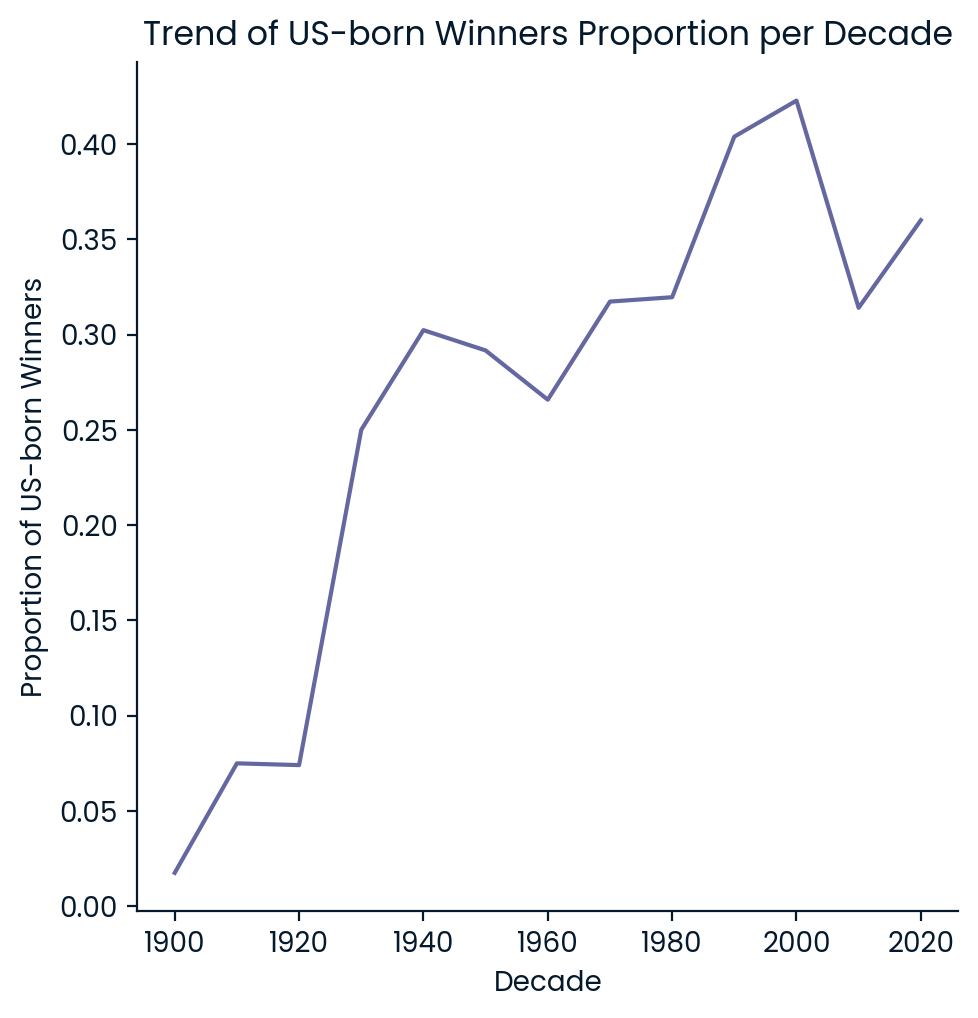

In [25]:
# Create a line plot to show the trend of US-born winners per decade
sns.relplot(x="decade", y="proportion", data=prop_usa_winners_df, kind="line")

# Add labels and title
plt.xlabel("Decade")
plt.ylabel("Proportion of US-born Winners")
plt.title("Trend of US-born Winners Proportion per Decade")


In [26]:
# Calculating the proportion of female laureates per decade
df["female_winner"] = df["sex"] == "Female"
prop_female_winners = df.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

In [27]:
max_female_dict

{2020: 'Literature'}

Text(0.5, 1.0, 'Trend of Female Winners Proportion per Decade')

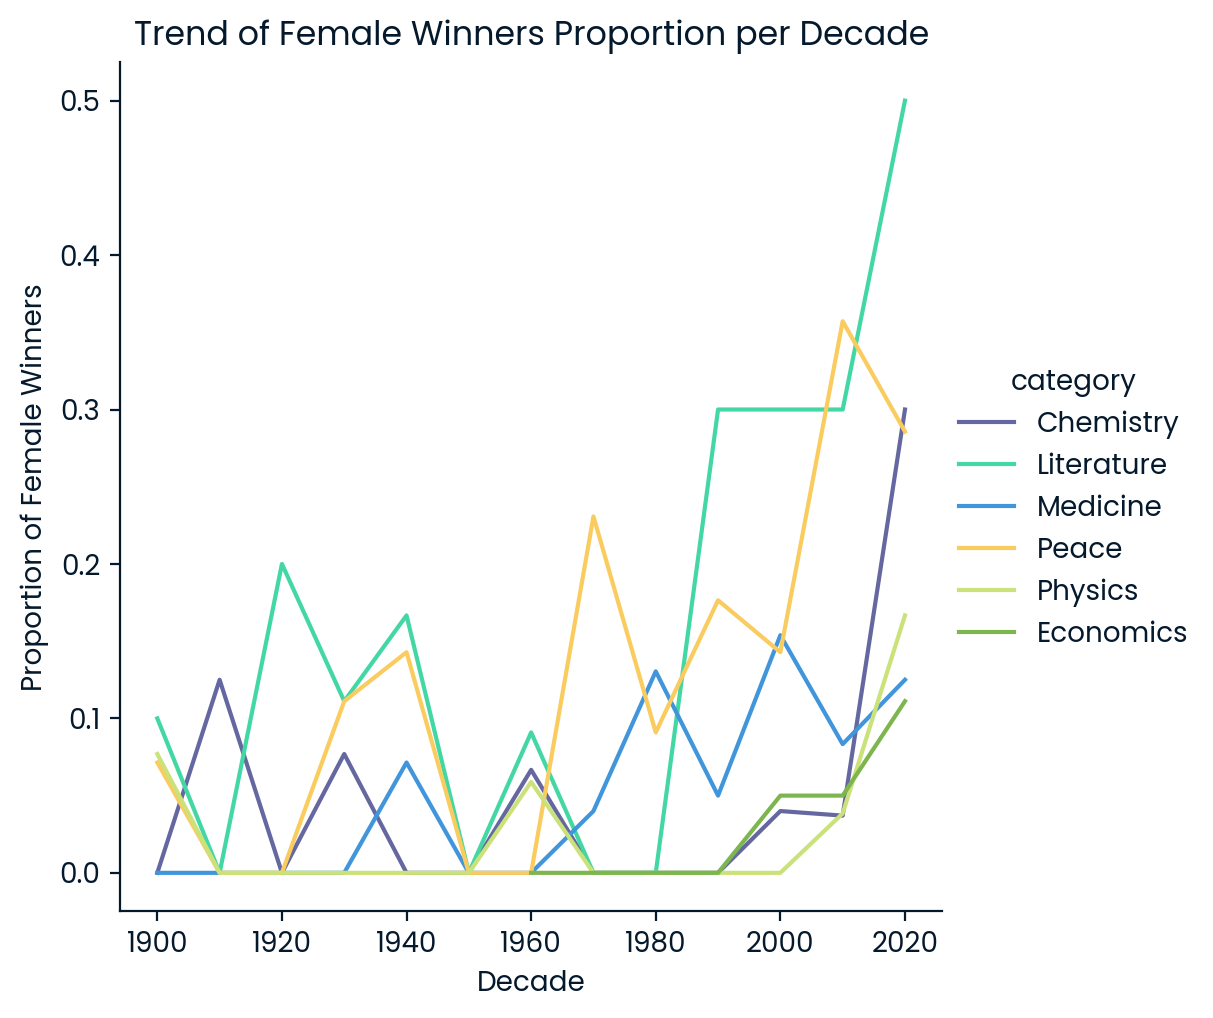

In [28]:
# Plotting female winners with % winners on the y-axis
sns.relplot(x="decade",
            y="female_winner",
            hue="category",
            data=prop_female_winners,
            kind="line")

# Add labels and title
plt.xlabel("Decade")
plt.ylabel("Proportion of Female Winners")
plt.title("Trend of Female Winners Proportion per Decade")

In [29]:
# Finding the first woman to win a Nobel Prize
first_woman_name, first_woman_category, _ = df[["full_name", "category", "year"]][df["sex"] == "Female"].sort_values(ascending=True, by="year")\
.iloc[0]

In [30]:
print(f"\n The first woman to win a Nobel Prize was {first_woman_name} in the category of {first_woman_category}.", )


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska in the category of Physics.


In [31]:
# Selecting the laureates that have received 2 or more prizes
laureate_counts = df["full_name"].value_counts()

multiple_occurrences = laureate_counts[laureate_counts >= 2].index

repeat_list = list(multiple_occurrences)

In [32]:
print("\n The repeat winners are :", repeat_list)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
